In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#parsing nfl data from the last 5 years to predict touchdowns based on passing yards

In [2]:
listy = [2021, 2020, 2019, 2018, 2017, 2016]
df = []
for i in range(0, len(listy)):
    url = "https://www.nfl.com/stats/player-stats/category/passing/%s/post/all/passingyards/desc" % listy[i]
    print(url)
    r = requests.get(url)
    print(r)
    dflist = pd.read_html(r.text) 
    print(dflist)
    df.append(dflist[0])
    # this parses all the tables in webpages to a list



df = np.array(df)

df = df.reshape(150, 16)
#use numpy to shape array into 2D array

df = pd.DataFrame(df)

listi = [0, 1, 2, 3, 4, 5, 6, 7, 8]
df = df[listi]
column_names = ['Player','Pass_Yds','Yds/Att','Att','Cmp','Cmp %', 'TD','INT', 'Rating']
df.columns = column_names
#rename column names

df
df.insert(1, 'year', 0)
pd.set_option('display.max_columns', 500)

m=0
y = 2021

for i in range(0, len(df['year'])):
    df.iloc[i, 1] = y
    m +=1
    
    if m == 25:
        y += -1
        m = 0
        #append year for each data point

        

        
        
            
        
       
    
    
    
        
   

    



https://www.nfl.com/stats/player-stats/category/passing/2021/post/all/passingyards/desc
<Response [200]>
[                Player  Pass Yds  Yds/Att  Att  Cmp  Cmp %  TD  INT   Rate  \
0            Tom Brady      5316      7.4  719  485   67.4  43   12  102.1   
1       Justin Herbert      5014      7.5  672  443   65.9  38   15   97.7   
2     Matthew Stafford      4886      8.1  601  404   67.2  41   17  102.9   
3      Patrick Mahomes      4839      7.4  658  436   66.3  37   13   98.4   
4           Derek Carr      4804      7.7  626  428   68.4  23   14   94.0   
5           Joe Burrow      4611      8.9  520  366   70.4  34   14  108.3   
6         Dak Prescott      4449      7.5  596  410   68.8  37   10  104.2   
7           Josh Allen      4407      6.8  646  409   63.3  36   15   92.2   
8         Kirk Cousins      4221      7.5  561  372   66.3  33    7  103.1   
9        Aaron Rodgers      4115      7.8  531  366   68.9  37    4  111.9   
10           Matt Ryan      3968    

<Response [200]>
[                Player  Pass Yds  Yds/Att  Att  Cmp  Cmp %  TD  INT   Rate  \
0   Ben Roethlisberger      5129      7.6  675  452   67.0  34   16   96.5   
1      Patrick Mahomes      5097      8.8  580  383   66.0  50   12  113.8   
2            Matt Ryan      4924      8.1  608  422   69.4  35    7  108.1   
3           Jared Goff      4688      8.4  561  364   64.9  32   12  101.1   
4          Andrew Luck      4593      7.2  639  430   67.3  39   15   98.7   
5        Aaron Rodgers      4442      7.4  597  372   62.3  25    2   97.6   
6            Tom Brady      4355      7.6  570  375   65.8  29   11   97.7   
7        Philip Rivers      4308      8.5  508  347   68.3  32   12  105.5   
8          Eli Manning      4299      7.5  576  380   66.0  21   11   92.4   
9         Kirk Cousins      4298      7.1  606  425   70.1  30   10   99.7   
10      Deshaun Watson      4165      8.2  505  345   68.3  26    9  103.1   
11          Derek Carr      4049      7.3  553

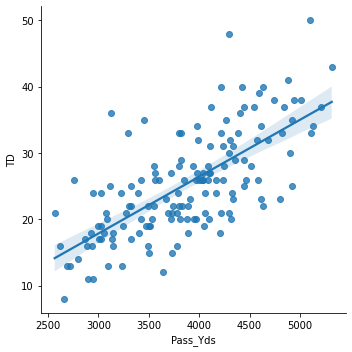

In [67]:
df['Pass_Yds'] = df['Pass_Yds'].astype('float32')
df['TD'] = df['TD'].astype('float32')

sns.lmplot(x='Pass_Yds', y='TD', data=df) 

#change to float for seaborn & check for linear relationship between passing yards and touchdowns


In [90]:
X = df['Pass_Yds'].values.reshape(-1, 1)
y = df['TD'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("The r^2 for this model is ", regr.score(X_test, y_test))


The r^2 for this model is  0.34514575871036246


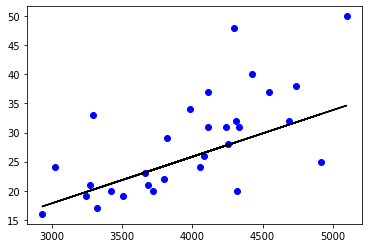

In [91]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

In [114]:
print("To estimate Pass-Yds based on Touchdowns use this equation ", "y=", regr.intercept_, "+", regr.coef_,"x")

print("Input a passing yard number to estimate predicted touchdowns")
i = input()
i =int(i)

r = (i * float(regr.coef_)) + float(regr.intercept_)
print(r)

#allow user to estimate touchdowns besides on desired passing yards

To estimate Pass-Yds based on Touchdowns use this equation  y= [-6.278927] + [[0.00802838]] x
Input a passing yard number to estimate predicted touchdowns
5200
35.46865697205067
